In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Industries', max_expense=.6), 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-02-25 to 2019-08-23 - 65


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

39


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
GDX,123,0.201064,0.803303,0.241899,30.171273,13.618845
GDXJ,123,0.156263,0.970922,0.153995,24.044543,16.567162
ITB,123,0.112887,0.444133,0.238986,12.207761,5.964365
XLP,123,0.098203,0.298003,0.306899,11.589750,4.896144
PPA,123,0.096737,0.361384,0.249017,10.702940,5.009724
XLK,123,0.094580,0.503906,0.174307,9.457389,10.458927
SOXX,123,0.085710,0.795682,0.099240,5.949042,18.160323
VDC,123,0.083292,0.293007,0.261241,9.616594,4.823314
XAR,123,0.082811,0.386448,0.196831,8.581262,6.769803


evicted CIBR 0.852 -0.107
evicted XLB 0.729 0.136
evicted IGF 0.672 0.228
evicted IYC 0.892 -0.156
evicted IYG 0.797 -0.255
evicted SMH 0.875 -0.111
evicted XLK 0.738 -0.081
evicted IHI 0.478 0.081
evicted XLC 0.496 -0.229
evicted ITB 0.527 -0.045
evicted XLU 0.557 0.208
retry backlogs ['VGT', 'VCR', 'IDU', 'VPU', 'VDC', 'FTEC', 'IGM', 'IGV', 'RYT', 'QTEC', 'XLF', 'SOXX', 'TDIV', 'VOX', 'IYJ', 'ITA', 'IXN', 'SKYY', 'IYW', 'XLY', 'XT', 'GDXJ', 'IXJ', 'XAR', 'IYF'] at 0.905/-0.51 - 0.411
evicted XT 0.880 0.055
evicted IXJ 0.573 0.114
evicted IYF 0.800 -0.216
evicted IGM 0.841 -0.145
evicted SOXX 0.604 -0.084
evicted VOX 0.518 -0.252
evicted VPU 0.582 0.232
retry backlogs ['VGT', 'VCR', 'VDC', 'IDU', 'FTEC', 'TDIV', 'IYJ', 'RYT', 'IYW', 'XLF', 'IGV', 'QTEC', 'SKYY', 'ITA', 'IXN', 'XLY', 'GDXJ', 'XAR'] at 0.910/-0.52 - 0.411
evicted IYJ 0.909 -0.122
evicted XLY 0.895 -0.068
evicted XLF 0.744 -0.258
evicted IYW 0.641 -0.128
evicted IDU 0.573 0.229
retry backlogs ['VGT', 'VCR', 'VDC', 'FTEC'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,123.0,0.119142,0.272488,-0.608772,-0.047581,0.119234,0.268250,1.082048,0.412480,15.209185,3.176388
XLP,123.0,0.098203,0.298003,-0.933048,-0.076274,0.104520,0.263175,1.062333,0.306899,11.589750,4.896144
PPA,123.0,0.096737,0.361384,-0.985206,-0.177129,0.065107,0.380549,1.066702,0.249017,10.702940,5.009724
GDX,123.0,0.201064,0.803303,-1.296176,-0.307947,0.125883,0.640850,2.232475,0.241899,30.171273,13.618845


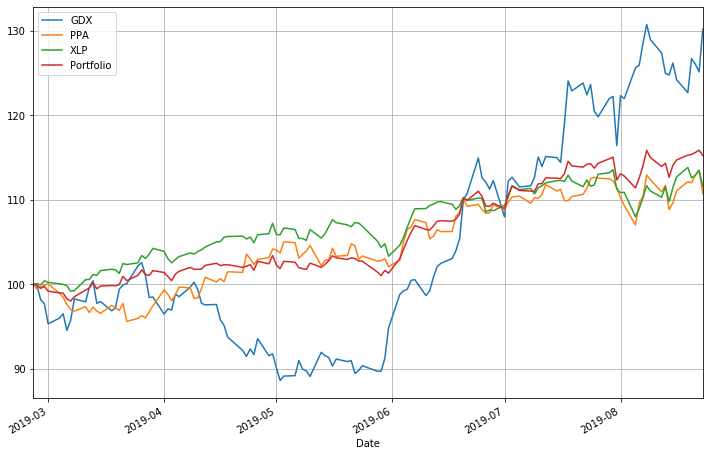

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['GDX', 'PPA', 'XLP'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,123.0,0.119667,0.273673,-0.600534,-0.052344,0.117334,0.270147,1.082494,0.412611,15.305640,3.137372
XLP,123.0,0.098203,0.298003,-0.933048,-0.076274,0.104520,0.263175,1.062333,0.306899,11.589750,4.896144
PPA,123.0,0.096737,0.361384,-0.985206,-0.177129,0.065107,0.380549,1.066702,0.249017,10.702940,5.009724
GDX,123.0,0.201064,0.803303,-1.296176,-0.307947,0.125883,0.640850,2.232475,0.241899,30.171273,13.618845


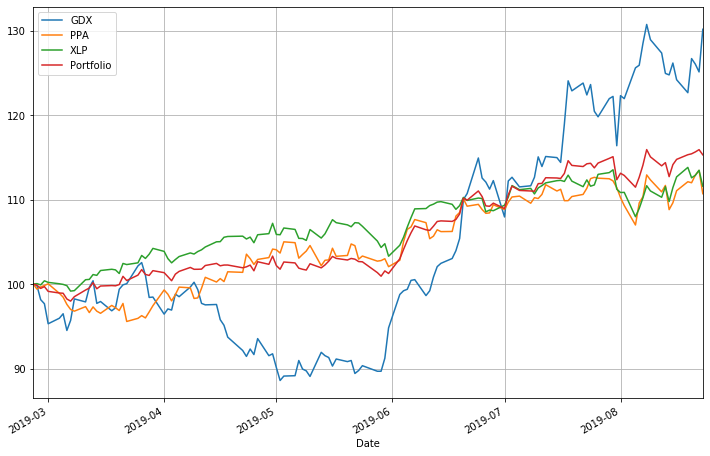

In [5]:
quote.setup_mask(['GDX', 'PPA', 'XLP'])
quote.graph({'GDX': 0.21, 'PPA': 0.21, 'XLP': 0.58})